## Estate Housing Data Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 2 csv files in the current version of the dataset:


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [17]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Filter columns with 1 to 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [18]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    df = df[numeric_cols]
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [19]:
def plotScatterMatrix(df, plotSize, textSize):
    # Select only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Drop rows and columns with NaN
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]

    # Create scatter matrix with diagonal KDE plots
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')
    
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: TestData.csv

In [20]:
nRowsRead = 1000  # specify 'None' if you want to read the whole file

# Replace the file path with the appropriate path to your CSV file
file_path = r'C:\Users\muski\Desktop\NewProject\TestData.csv'

# Use the correct syntax for pd.read_csv, specifying the file path, delimiter, and nrows
df1 = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead)

df1.dataframeName = 'TestData.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 79 columns


Let's take a quick look at what the data looks like:

In [21]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Distribution graphs (histogram/bar graph) of sampled columns:

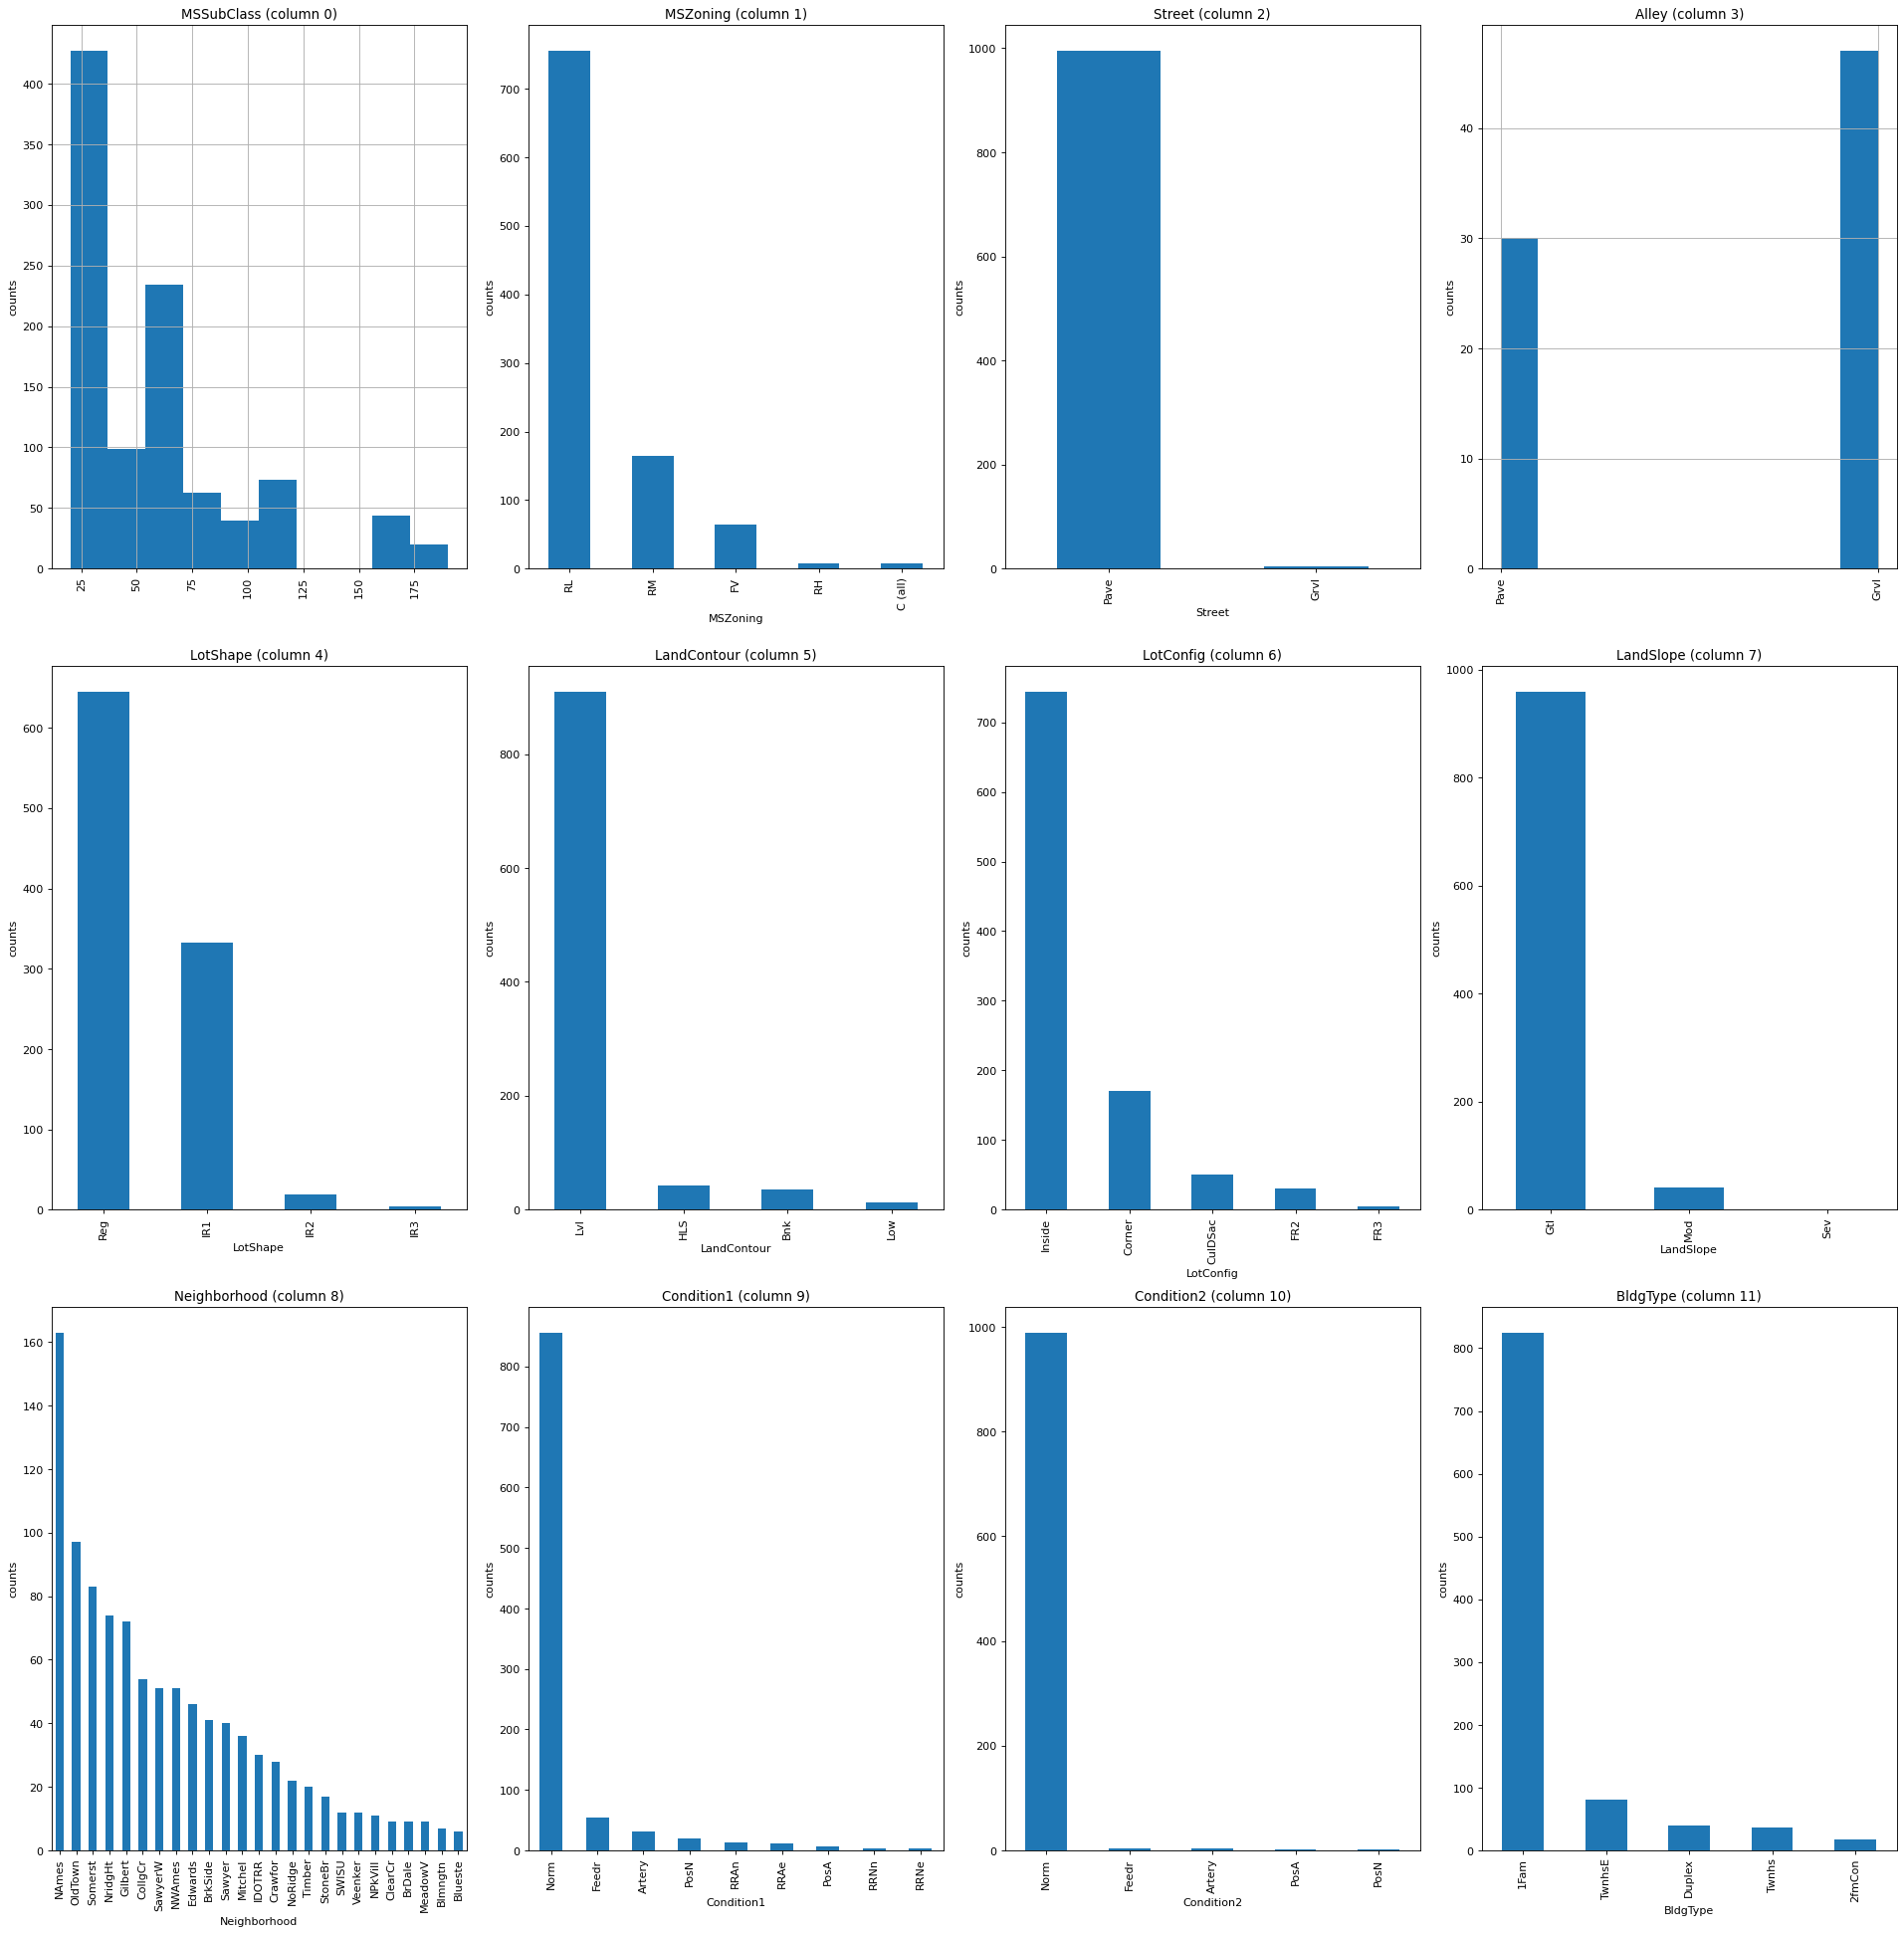

In [22]:
plotPerColumnDistribution(df1, 12, 4)

Correlation matrix:

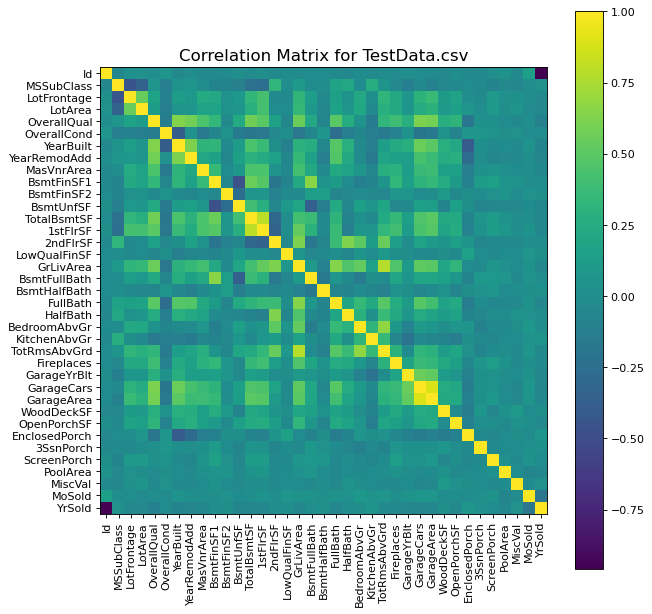

In [23]:
plotCorrelationMatrix(df1, 9)

Scatter and density plots:

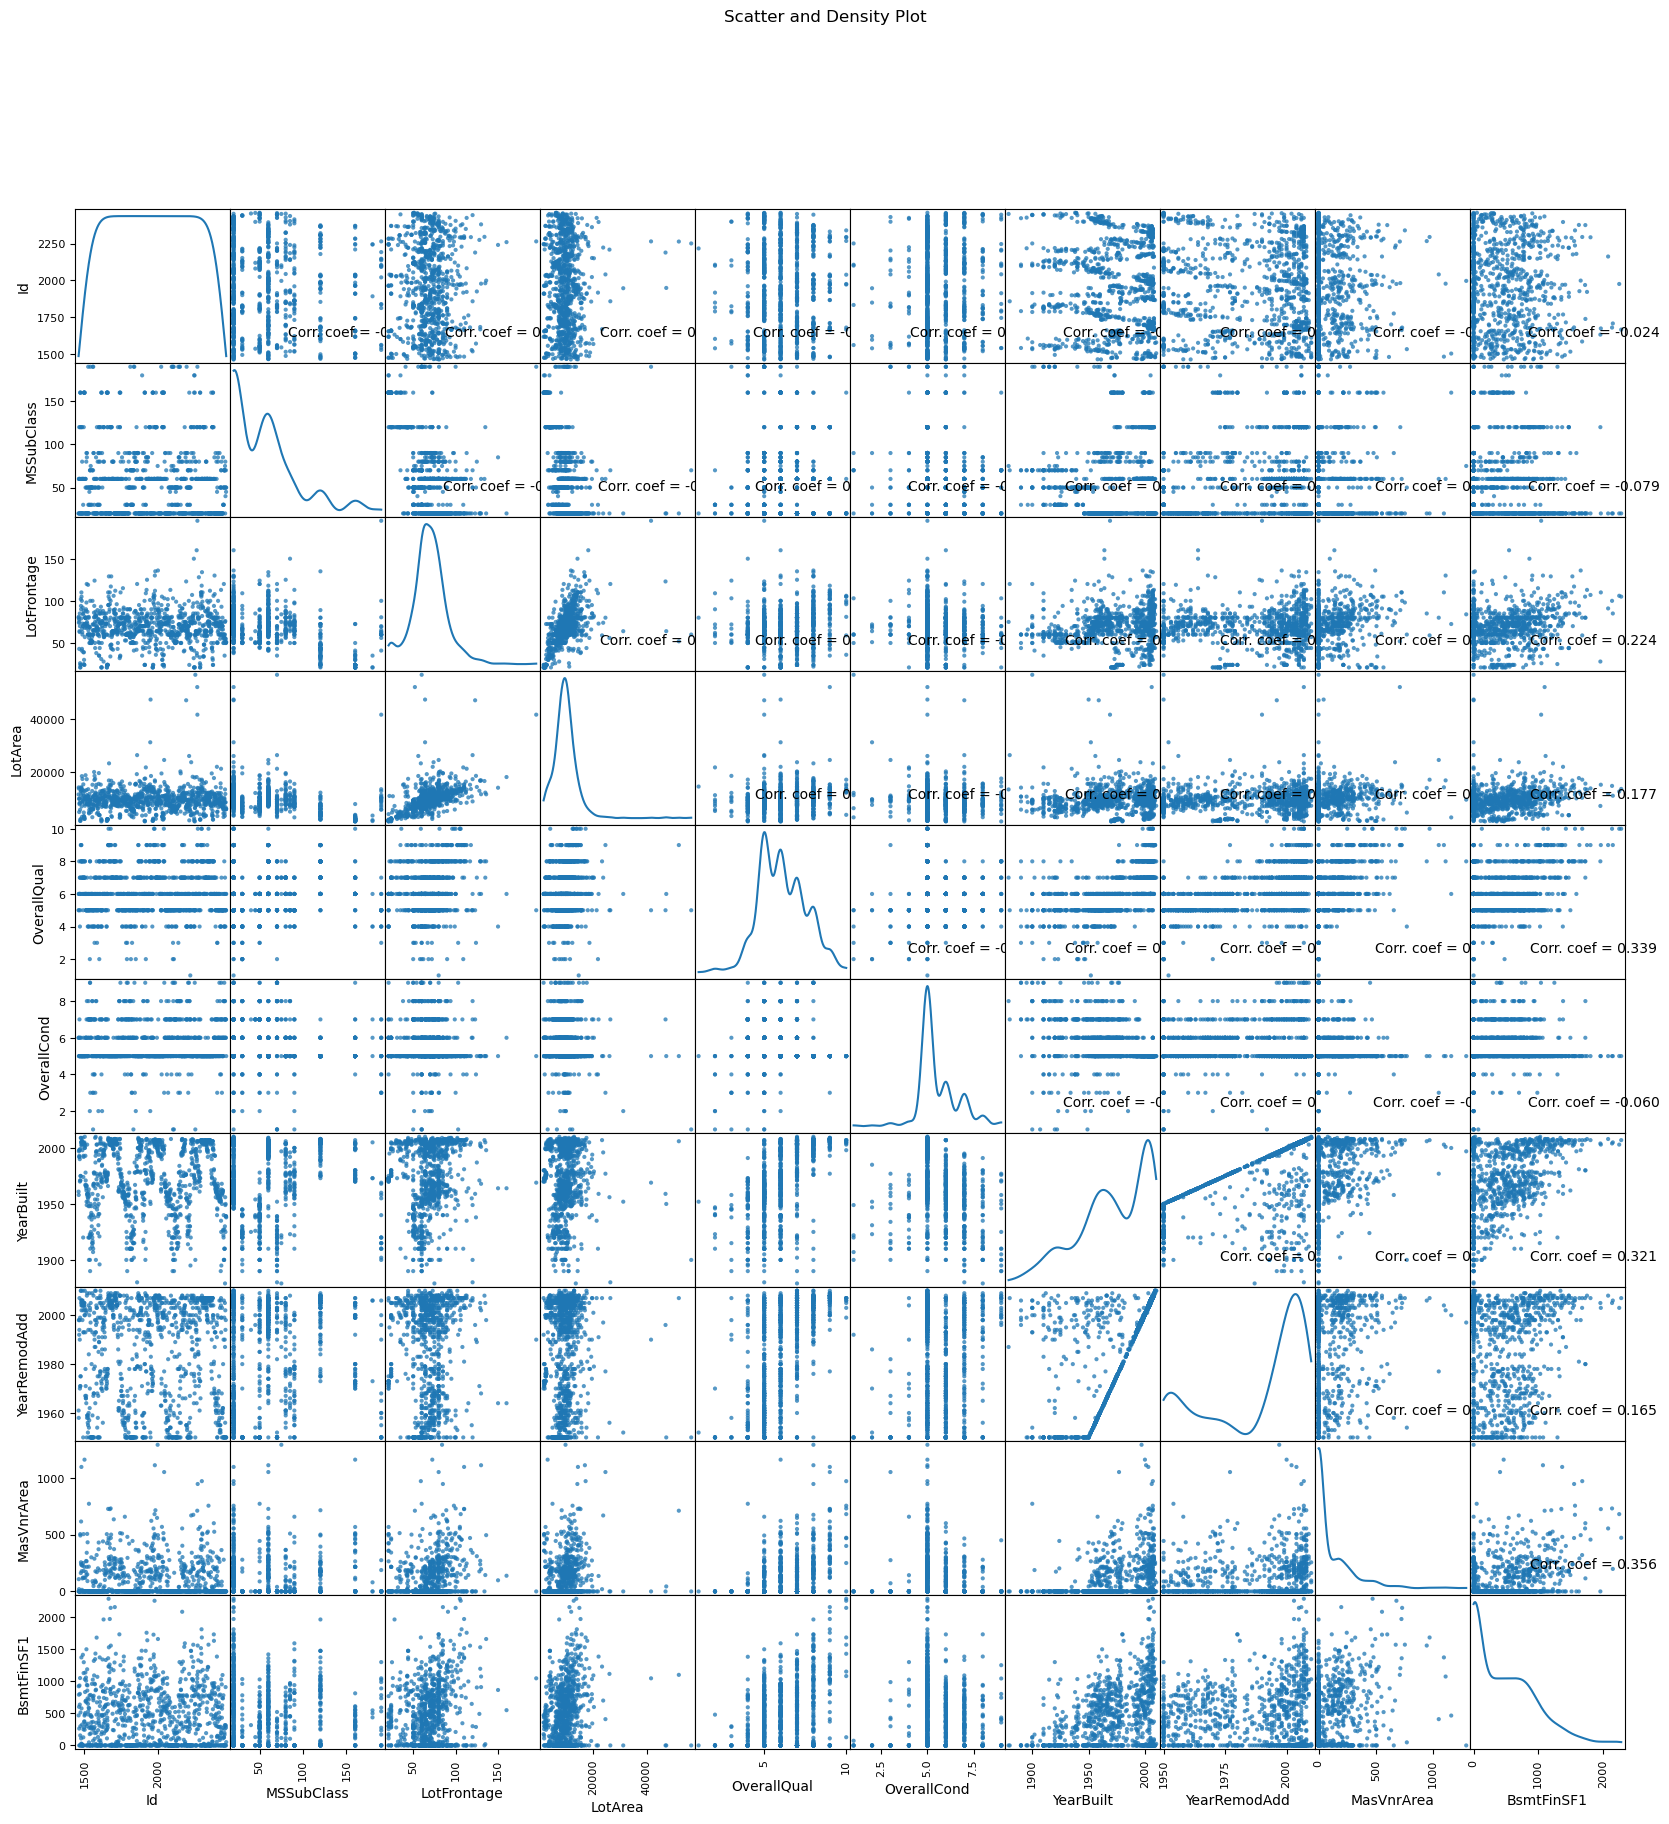

In [24]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: TrainData.csv

In [25]:
nRowsRead = 1000  # specify 'None' if you want to read the whole file
file_path = r'C:\Users\muski\Desktop\NewProject\TrainData.csv'

df2 = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead)
df2.dataframeName = 'TrainData.csv'
nRow, nCol = df2.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 80 columns


Let's take a quick look at what the data looks like:

In [26]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Distribution graphs (histogram/bar graph) of sampled columns:

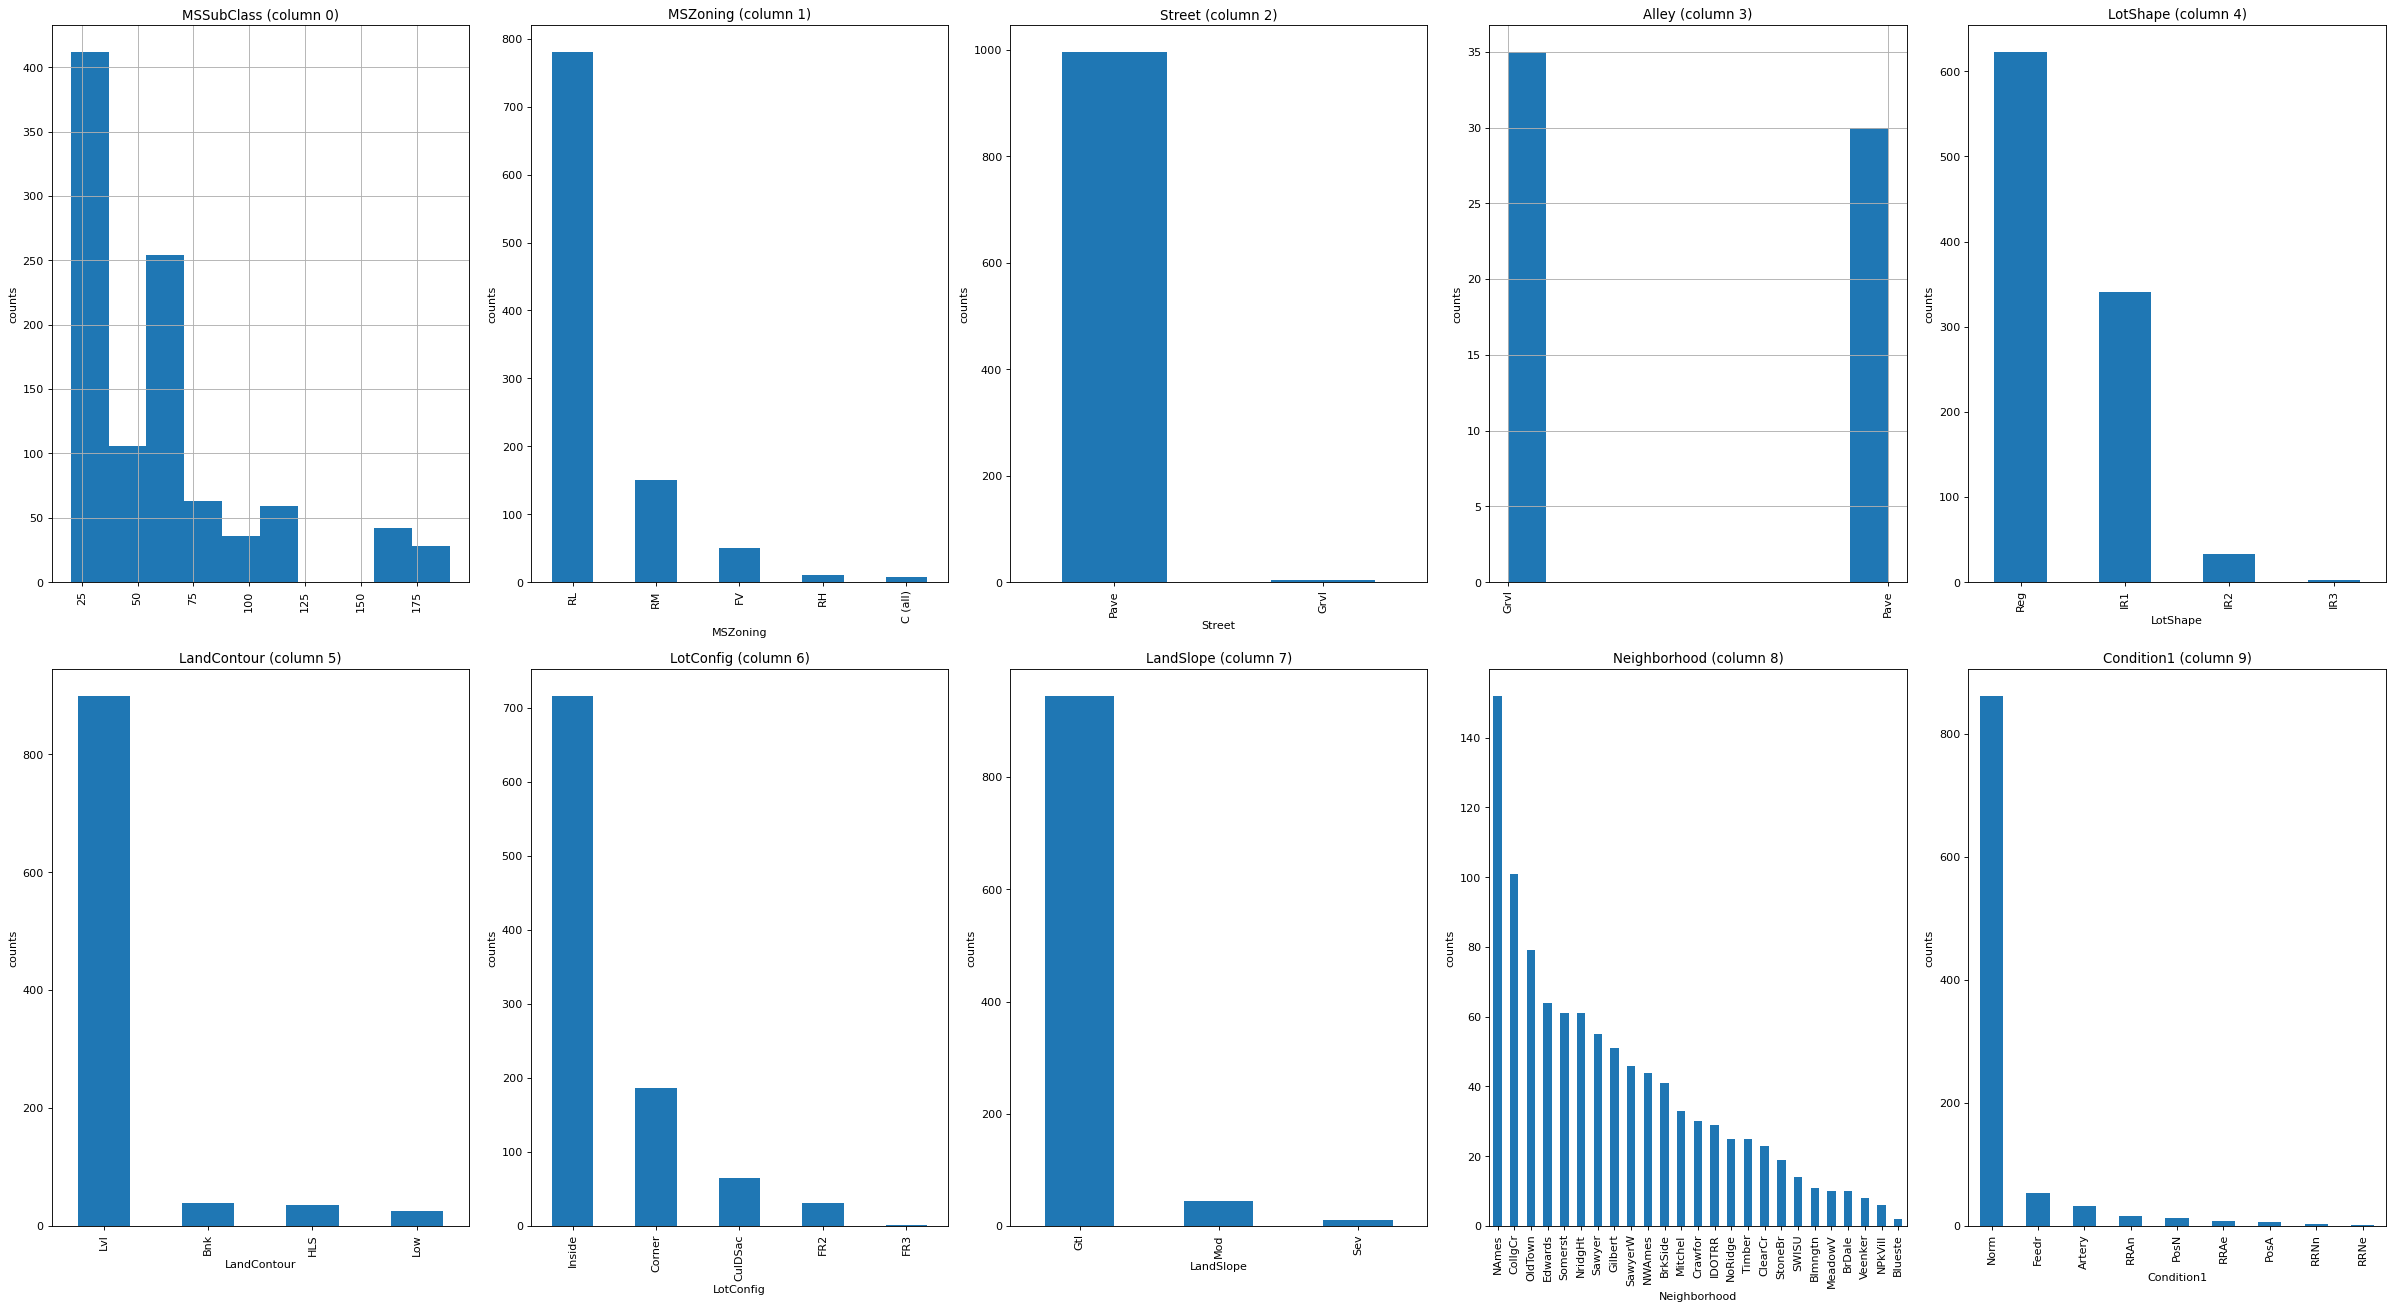

In [27]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

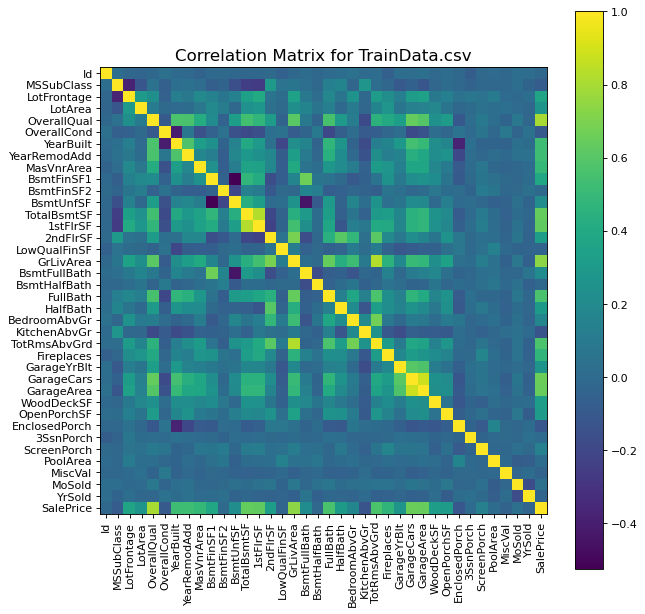

In [28]:
plotCorrelationMatrix(df2, 9)

Scatter and density plots:

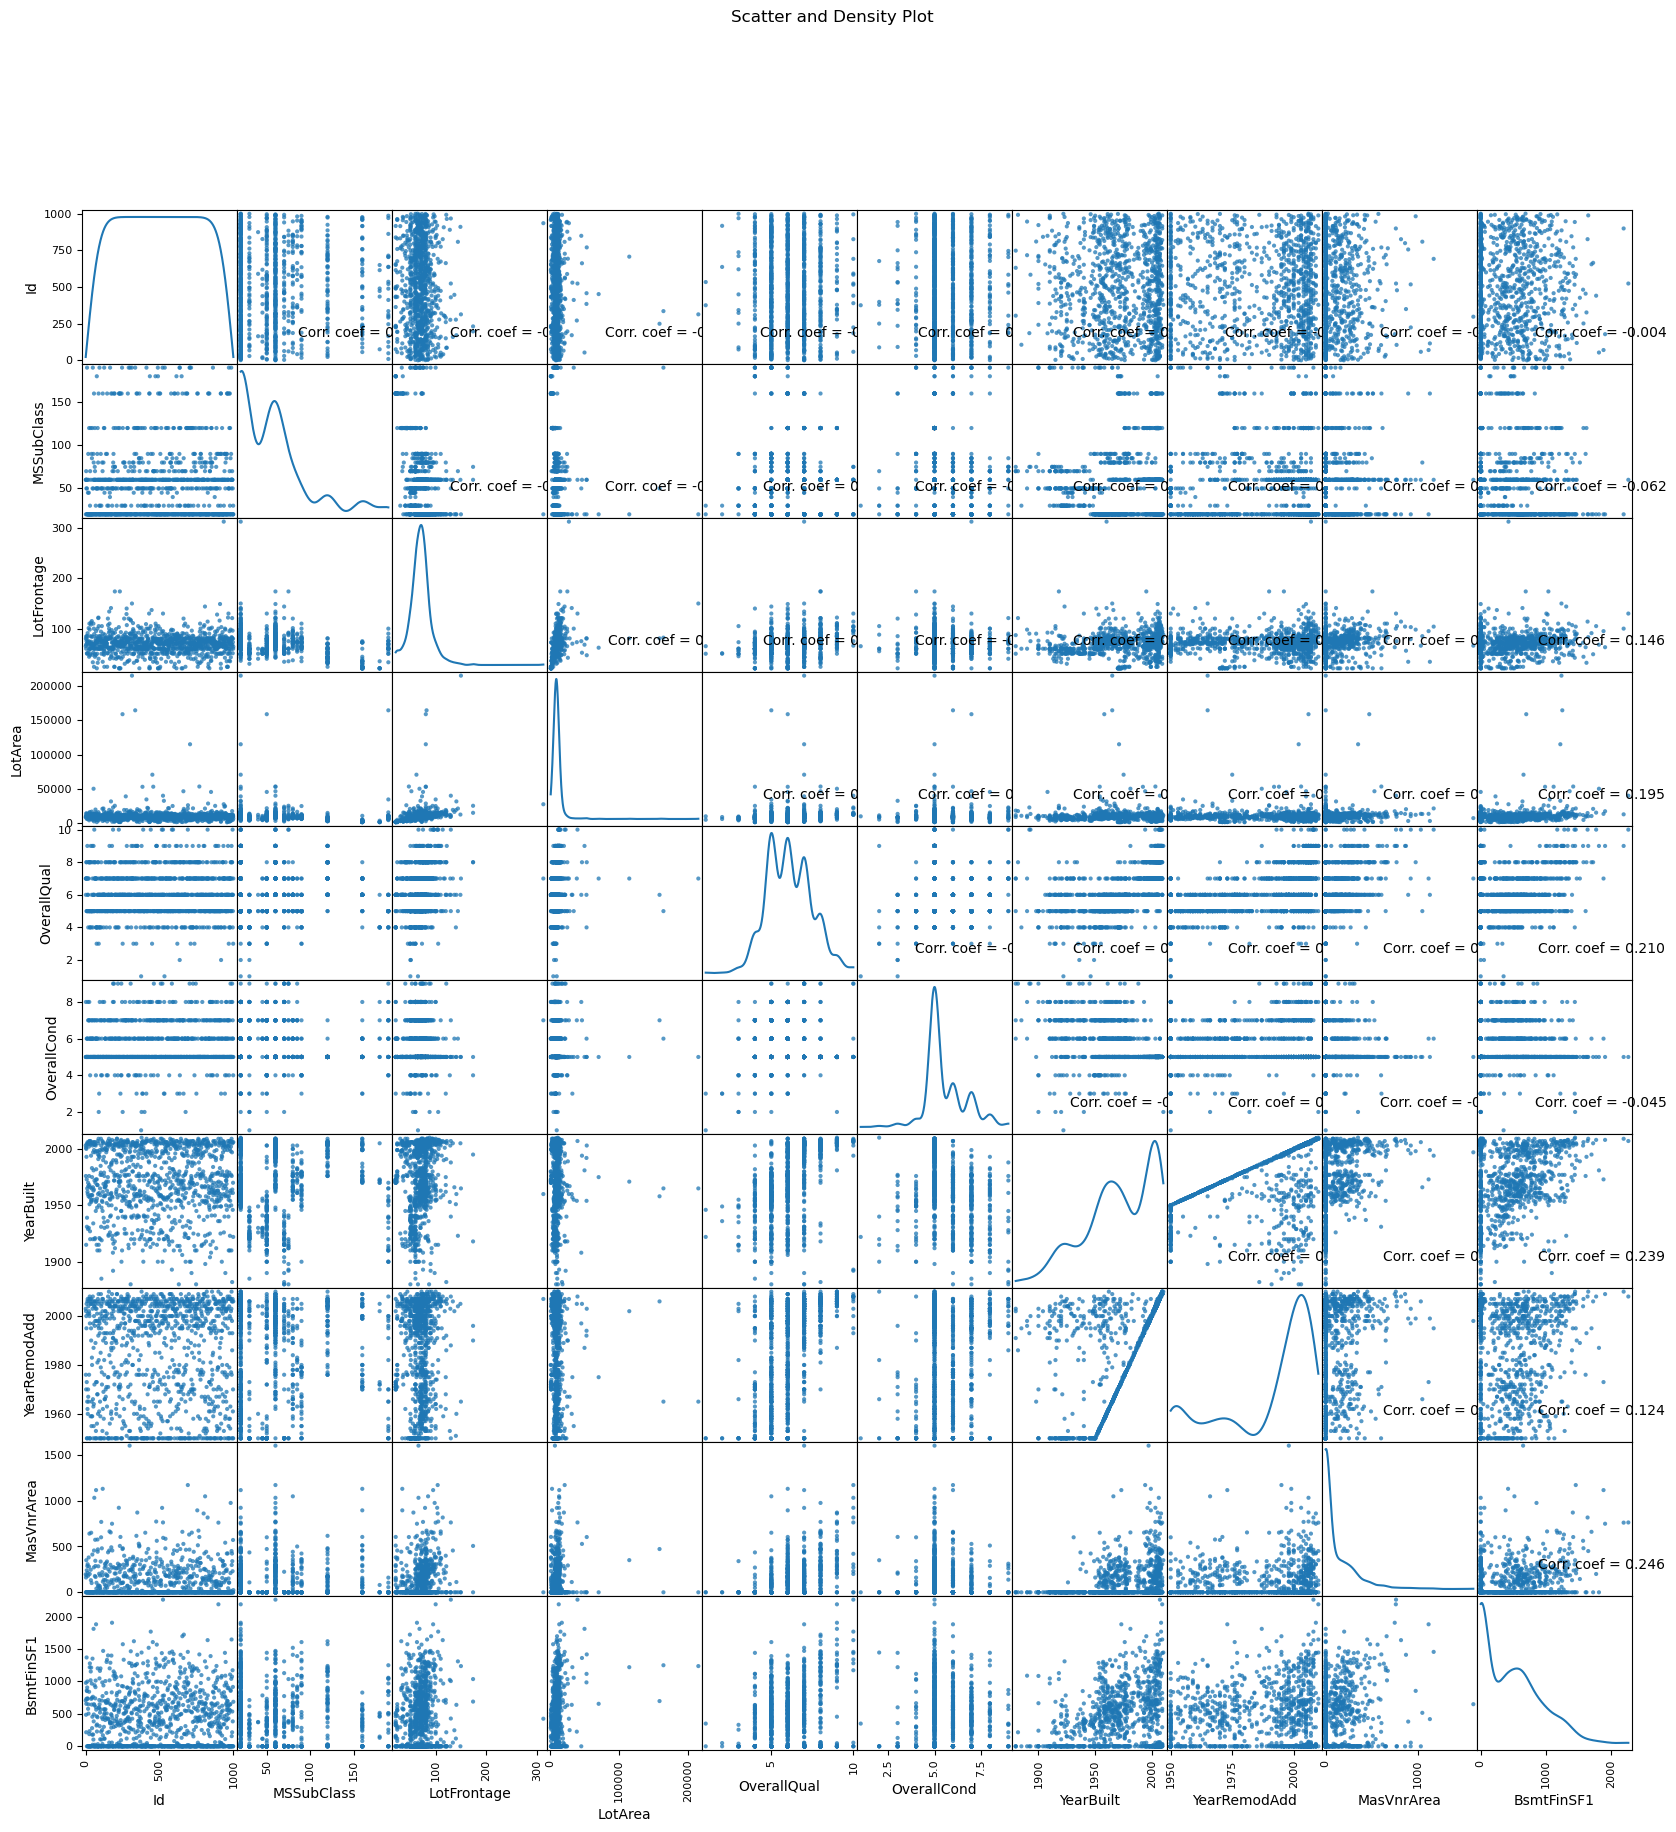

In [29]:
plotScatterMatrix(df2, 20, 10)